<a href="https://colab.research.google.com/github/hjlinq/WordCloud/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Here are all the installs and imports

!pip install wordcloud

import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import io
import sys
from google.colab import files

In [2]:
# Here we wget the text file and convert it to the file_contents string

!wget https://www.gutenberg.org/cache/epub/2017/pg2017.txt

txtfilename = "/content/pg2017.txt"
txtfile = open(txtfilename, "r")
file_contents = txtfile.read()

--2022-02-24 17:55:55--  https://www.gutenberg.org/cache/epub/2017/pg2017.txt
Resolving www.gutenberg.org (www.gutenberg.org)... 152.19.134.47, 2610:28:3090:3000:0:bad:cafe:47
Connecting to www.gutenberg.org (www.gutenberg.org)|152.19.134.47|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88062 (86K) [text/plain]
Saving to: ‘pg2017.txt.3’

pg2017.txt.3        100%[===================>]  86.00K  --.-KB/s    in 0.06s   

2022-02-24 17:55:56 (1.36 MB/s) - ‘pg2017.txt.3’ saved [88062/88062]



In [3]:
def calculate_frequencies(file_contents):

    uninteresting_words = ["the", "a", "to", "if", "is", "it", "in", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", \
    "for", "these", "there", "not", "gutenbergtm", "project", "on", "let", "chapter"]
    
    file_alpha = ""
    
    # Change to lowercase
    for char in file_contents:
        if char.isalpha():
            file_alpha += char.lower()
        if char.isspace():
            file_alpha += " "
    
    # Split, sort, and filter out uninteresting words

    file_list = file_alpha.split()
    
    file_list.sort()
    
    file_list = [word for word in file_list if word not in uninteresting_words]

    # Convert to dictionary
    
    file_dict = {word:0 for word in file_list}

    # Count words
    
    for word in file_dict.keys():
                    
        file_dict[word] = file_list.count(word)
            
    # Create wordcloud
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(file_dict)
    return cloud.to_array()

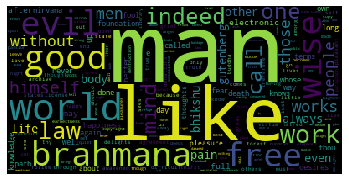

In [4]:
# Display wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()